# Spotify Music Data Analysis in Quarantine: Clustering

<p>Students:</p>
<ul>
    <li> Ronie Arauco </li>
    <li> Handry Guillen </li>
<ul>

The data that we are using have been extracted first from SpotifyCharts (Official Spotify page for Top 50 and Top viral 50), this data contains all the Top 50 id's tracks for each country available for Spotify.

Once we have the id's, we make use of Spotify API for extract all the variables available for each track. These are the follows:

|Fields|Type|Description|
|---|---|---|
|country|string|Country of the Top 50 Playlist.|
|date_extraction|timestamp|Date of the Top 50 Playlist.|
|track_id|string|The Spotify ID for the track.|
|streams|int|Number of streams of the track.|
|album|string|The album on which the track appears.|
|artist|string|The artists who performed the track.|
|duration_ms|int|The duration of the track in milliseconds.|
|track_name|string|The name of the track.|
|track_danceability|float|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.|
|track_energy|float|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.|
|track_key|int|The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.|
|track_loudness|float|The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|track_mode|int|Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|track_speechiness|float|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
|track_acousticness|float|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|track_instrumentalness|float|Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.|
|track_liveness|float|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.|
|track_valence|float|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).|
|track_tempo|float|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.|
|explicit|bool|One (1) when the track has explicit lyrics.|
|not_explicit|bool|Zero (0) when the track doesn't have explicit lyrics.|

<img src="https://dl-ta-dataset.s3.amazonaws.com/expo.png" alt="drawing" width="1000"/>

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', 100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. GMM

### 1.1. Reading the data

In [2]:
# Just for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df_southamerica = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_southamerica.csv')
df_northamerica = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_northamerica.csv')
df_europe = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_europe.csv')
df_asia = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_asia.csv')
df_africa = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_africa.csv')
df_oceania = pd.read_csv('/content/drive/My Drive/data-analysis-ta-2020/dataset_tracks_oceania.csv')

In [4]:
df_southamerica.shape

(2166, 21)

In [5]:
df_southamerica.sample(5)

,country,date_extraction,track_id,streams,album,artist,duration_ms,track_name,track_danceability,track_energy,track_key,track_loudness,track_mode,track_speechiness,track_acousticness,track_instrumentalness,track_liveness,track_valence,track_tempo,not_explicit,explicit
645,Brazil,2020-02-26,3ugHD1hbqLwHl4ubH72EbU,0.096034,Sacanagenzinha,"Harmonia Do Samba,Ludmilla",0.059918,Sacanagenzinha,0.751,0.870,0.909091,0.601866,0.0,0.0434,0.404,0.000000,0.9080,0.751,0.518764,1,0
915,Chile,2020-04-01,4xvTPuwHaXoDM3p0QcY7bH,0.025071,Música,"DJ Luian,Mambo Kingz,Farruko,Wisin,Myke Towers...",0.128698,Música,0.788,0.820,0.090909,0.682329,0.0,0.1690,0.220,0.000203,0.0799,0.854,0.804500,0,1
1463,Bolivia,2020-06-06,2alIsNw1mqEShbWyO1HXZZ,0.000318,MANTRA,"Sebastian Yatra,Luis Figueroa,Lary Over",0.145729,Por Perro,0.684,0.762,0.000000,0.637079,1.0,0.0501,0.429,0.000000,0.0852,0.892,0.764251,1,0
2017,Uruguay,2020-06-11,5PcInxO1rmTE6Kl2y9akaI,0.003319,La Jeepeta (Remix),"DJ Alan Gomez,Jona Mix",0.092338,La Jeepeta - Remix,0.823,0.642,0.000000,0.487711,1.0,0.1060,0.147,0.000465,0.0732,0.816,0.288170,1,0
597,Bolivia,2020-02-23,2WPxFf05MYsEHQCxonA1vS,0.000243,De Plaza En Plaza (Cumbia Sinfónica/Deluxe),"Los Angeles Azules,Ha*Ash",0.105300,Mi Niña Mujer,0.490,0.631,0.636364,0.680158,1.0,0.0335,0.395,0.000000,0.0645,0.796,0.178614,1,0


### 1.2. Elbow Method

In [7]:
df_southamerica_features = df_southamerica.loc[:, \
    ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_southamerica_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.655,0.1110,0.712,0.838
1,0.790,0.2300,0.868,0.519
2,0.916,0.0679,0.809,0.736
3,0.762,0.6160,0.799,0.732
4,0.875,0.2350,0.772,0.641


In [8]:
df_northamerica_features = df_northamerica.loc[:, \
    ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_northamerica_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.887,0.0192,0.881,0.599
1,0.713,0.0400,0.354,0.699
2,0.638,0.0200,0.735,0.378
3,0.848,0.0330,0.485,0.447
4,0.798,0.2260,0.857,0.649


In [9]:
df_europe_features = df_europe.loc[:, \
    ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_europe_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.974,0.1030,0.965,0.728
1,0.586,0.1910,0.119,0.851
2,0.626,0.0589,0.350,0.835
3,0.812,0.2300,0.888,0.659
4,0.656,0.6640,0.782,0.450


In [10]:
df_asia_features = df_asia.loc[:, \
    ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_asia_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.322,0.370,0.229,0.589
1,0.301,0.874,0.251,0.544
2,0.350,0.685,0.528,0.689
3,0.570,0.695,0.211,0.324
4,0.330,0.892,0.285,0.559


In [11]:
df_africa_features = df_africa.loc[:, \
    ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_africa_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.438,0.0662,0.277,0.898
1,0.875,0.0121,0.771,0.869
2,0.707,0.0129,0.137,0.763
3,0.603,0.0122,0.444,0.773
4,0.635,0.4470,0.428,0.784


In [12]:
df_oceania_features = df_oceania.loc[:, \
    ['track_energy', 'track_acousticness', 'track_valence', \
     'track_danceability']]
df_oceania_features.head()

,track_energy,track_acousticness,track_valence,track_danceability
0,0.609,0.00801,0.928,0.856
1,0.881,0.29600,0.234,0.674
2,0.530,0.05780,0.507,0.907
3,0.386,0.01770,0.353,0.828
4,0.600,0.07100,0.568,0.859


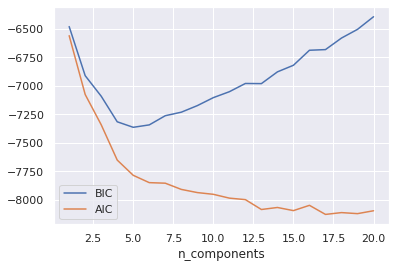

In [13]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_southamerica_features)
          for n in n_components]

plt.plot(n_components, [m.bic(df_southamerica_features) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_southamerica_features) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# 5 clusters

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. In this case, we will chosse the minimun values of both which is approximately 8.

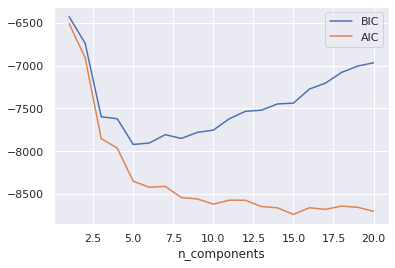

In [14]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_northamerica_features)
          for n in n_components]

plt.plot(n_components, [m.bic(df_northamerica_features) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_northamerica_features) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# 5 clusters

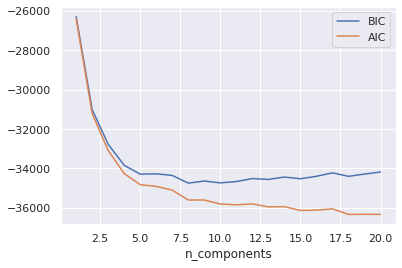

In [15]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_europe_features)
          for n in n_components]

plt.plot(n_components, [m.bic(df_europe_features) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_europe_features) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# 10 clusters

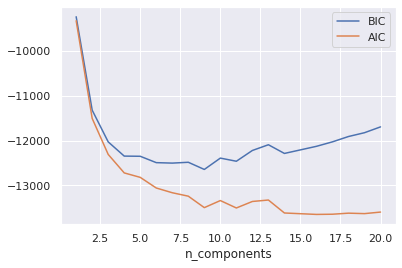

In [16]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_asia_features)
          for n in n_components]

plt.plot(n_components, [m.bic(df_asia_features) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_asia_features) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# 9 clusters

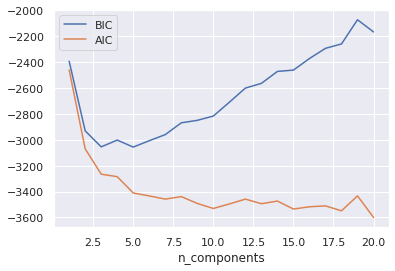

In [17]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_africa_features)
          for n in n_components]

plt.plot(n_components, [m.bic(df_africa_features) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_africa_features) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# 5 clusters

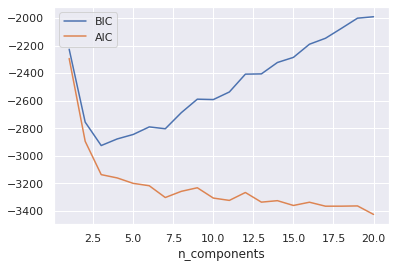

In [18]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_oceania_features)
          for n in n_components]

plt.plot(n_components, [m.bic(df_oceania_features) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_oceania_features) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

# 3 clusters

### 1.3. GMM Algorithm

In [19]:
clusters = GaussianMixture(n_components=5, covariance_type='full', random_state=0)
clusters.fit(df_southamerica_features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [20]:
df_southamerica_features['clusters'] = clusters.predict(df_southamerica_features)
df_southamerica_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.655,0.1110,0.712,0.838,3
1,0.790,0.2300,0.868,0.519,0
2,0.916,0.0679,0.809,0.736,3
3,0.762,0.6160,0.799,0.732,2
4,0.875,0.2350,0.772,0.641,0


In [21]:
clusters = GaussianMixture(n_components=5, covariance_type='full', random_state=0)
clusters.fit(df_southamerica_features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [22]:
df_southamerica_features['clusters'] = clusters.predict(df_southamerica_features)
df_southamerica_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.655,0.1110,0.712,0.838,2
1,0.790,0.2300,0.868,0.519,0
2,0.916,0.0679,0.809,0.736,2
3,0.762,0.6160,0.799,0.732,1
4,0.875,0.2350,0.772,0.641,0


In [23]:
clusters = GaussianMixture(n_components=5, covariance_type='full', random_state=0)
clusters.fit(df_northamerica_features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [24]:
df_northamerica_features['clusters'] = clusters.predict(df_northamerica_features)
df_northamerica_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.887,0.0192,0.881,0.599,1
1,0.713,0.0400,0.354,0.699,1
2,0.638,0.0200,0.735,0.378,1
3,0.848,0.0330,0.485,0.447,1
4,0.798,0.2260,0.857,0.649,4


In [25]:
clusters = GaussianMixture(n_components=10, covariance_type='full', random_state=0)
clusters.fit(df_europe_features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=0, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [26]:
df_europe_features['clusters'] = clusters.predict(df_europe_features)
df_europe_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.974,0.1030,0.965,0.728,1
1,0.586,0.1910,0.119,0.851,0
2,0.626,0.0589,0.350,0.835,0
3,0.812,0.2300,0.888,0.659,1
4,0.656,0.6640,0.782,0.450,7


In [27]:
clusters = GaussianMixture(n_components=9, covariance_type='full', random_state=0)
clusters.fit(df_asia_features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=9, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [28]:
df_asia_features['clusters'] = clusters.predict(df_asia_features)
df_asia_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.322,0.370,0.229,0.589,7
1,0.301,0.874,0.251,0.544,2
2,0.350,0.685,0.528,0.689,5
3,0.570,0.695,0.211,0.324,7
4,0.330,0.892,0.285,0.559,2


In [29]:
clusters = GaussianMixture(n_components=5, covariance_type='full', random_state=0)
clusters.fit(df_africa_features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [30]:
df_africa_features['clusters'] = clusters.predict(df_africa_features)
df_africa_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.438,0.0662,0.277,0.898,3
1,0.875,0.0121,0.771,0.869,2
2,0.707,0.0129,0.137,0.763,2
3,0.603,0.0122,0.444,0.773,2
4,0.635,0.4470,0.428,0.784,4


In [31]:
clusters = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
clusters.fit(df_oceania_features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [32]:
df_oceania_features['clusters'] = clusters.predict(df_oceania_features)
df_oceania_features.head()

,track_energy,track_acousticness,track_valence,track_danceability,clusters
0,0.609,0.00801,0.928,0.856,0
1,0.881,0.29600,0.234,0.674,2
2,0.530,0.05780,0.507,0.907,0
3,0.386,0.01770,0.353,0.828,0
4,0.600,0.07100,0.568,0.859,1


In [39]:
pca = PCA(n_components=2)
pca_southamerica = pca.fit_transform(df_southamerica_features)

pca = PCA(n_components=2)
pca_northamerica = pca.fit_transform(df_northamerica_features)

pca = PCA(n_components=2)
pca_europe = pca.fit_transform(df_europe_features)

pca = PCA(n_components=2)
pca_asia = pca.fit_transform(df_asia_features)

pca = PCA(n_components=2)
pca_africa = pca.fit_transform(df_africa_features)

pca = PCA(n_components=2)
pca_oceania = pca.fit_transform(df_oceania_features)

In [40]:
df_pca_southamerica = pd.DataFrame(data=pca_southamerica, columns=['pca1', 'pca2'])
df_pca_southamerica['clusters'] = df_southamerica_features['clusters']

df_pca_northamerica = pd.DataFrame(data=pca_northamerica, columns=['pca1', 'pca2'])
df_pca_northamerica['clusters'] = df_northamerica_features['clusters']

df_pca_europe = pd.DataFrame(data=pca_europe, columns=['pca1', 'pca2'])
df_pca_europe['clusters'] = df_europe_features['clusters']

df_pca_asia = pd.DataFrame(data=pca_asia, columns=['pca1', 'pca2'])
df_pca_asia['clusters'] = df_asia_features['clusters']

df_pca_africa = pd.DataFrame(data=pca_africa, columns=['pca1', 'pca2'])
df_pca_africa['clusters'] = df_africa_features['clusters']

df_pca_oceania = pd.DataFrame(data=pca_oceania, columns=['pca1', 'pca2'])
df_pca_oceania['clusters'] = df_oceania_features['clusters']
df_pca_oceania.head()

,pca1,pca2,clusters
0,-0.977224,-0.364972,0
1,1.019869,0.077670,2
2,-0.950525,0.034027,0
3,-0.944232,0.232486,0
4,0.010989,-0.119115,1


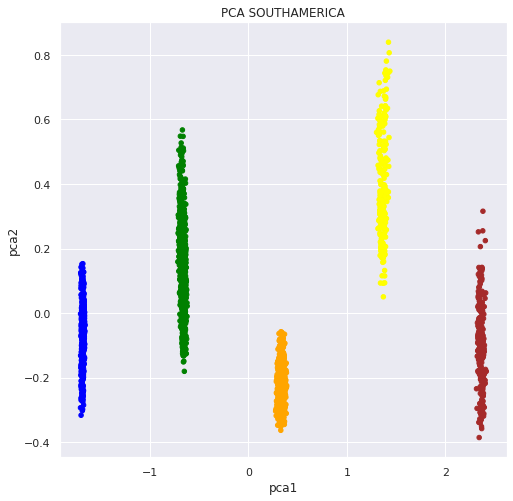

In [41]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_title('PCA SOUTHAMERICA')
colors = np.array(['blue', 'green', 'orange', 'yellow','brown','red','black','purple', 'gray', 'black'])
ax.scatter(x=df_pca_southamerica['pca1'], y=df_pca_southamerica['pca2'], c=colors[df_pca_southamerica['clusters']], s=20)
plt.show()

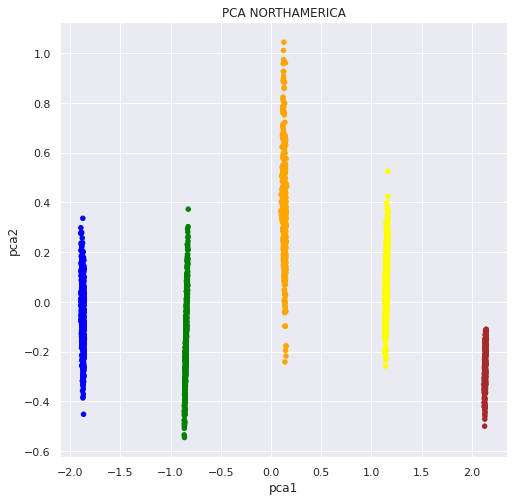

In [42]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_title('PCA NORTHAMERICA')
colors = np.array(['blue', 'green', 'orange', 'yellow','brown','red','black','purple', 'gray', 'black'])
ax.scatter(x=df_pca_northamerica['pca1'], y=df_pca_northamerica['pca2'], c=colors[df_pca_northamerica['clusters']], s=20)
plt.show()

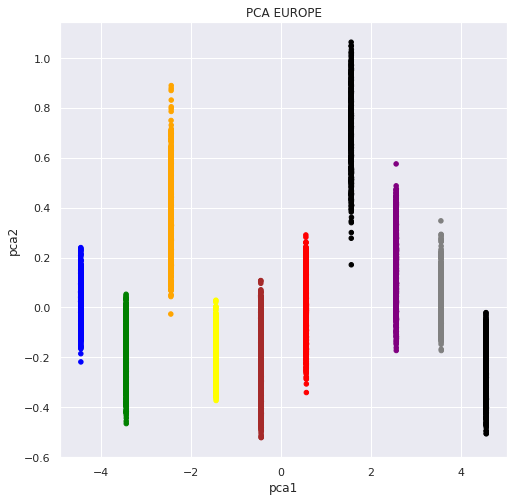

In [43]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_title('PCA EUROPE')
colors = np.array(['blue', 'green', 'orange', 'yellow','brown','red','black','purple', 'gray', 'black'])
ax.scatter(x=df_pca_europe['pca1'], y=df_pca_europe['pca2'], c=colors[df_pca_europe['clusters']], s=20)
plt.show()

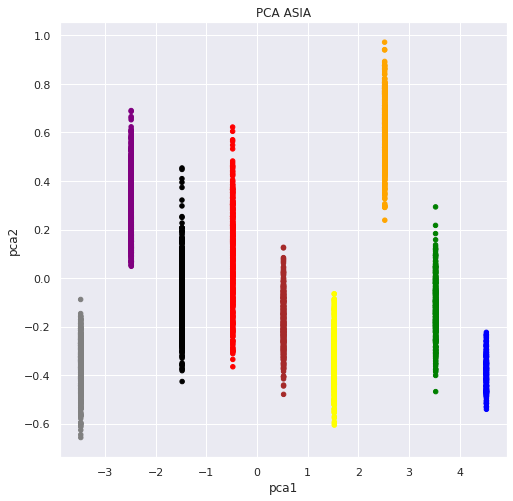

In [44]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_title('PCA ASIA')
colors = np.array(['blue', 'green', 'orange', 'yellow','brown','red','black','purple', 'gray', 'black'])
ax.scatter(x=df_pca_asia['pca1'], y=df_pca_asia['pca2'], c=colors[df_pca_asia['clusters']], s=20)
plt.show()

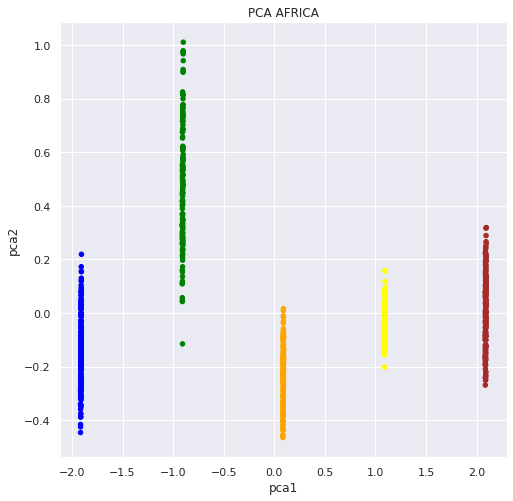

In [45]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_title('PCA AFRICA')
colors = np.array(['blue', 'green', 'orange', 'yellow','brown','red','black','purple', 'gray', 'black'])
ax.scatter(x=df_pca_africa['pca1'], y=df_pca_africa['pca2'], c=colors[df_pca_africa['clusters']], s=20)
plt.show()

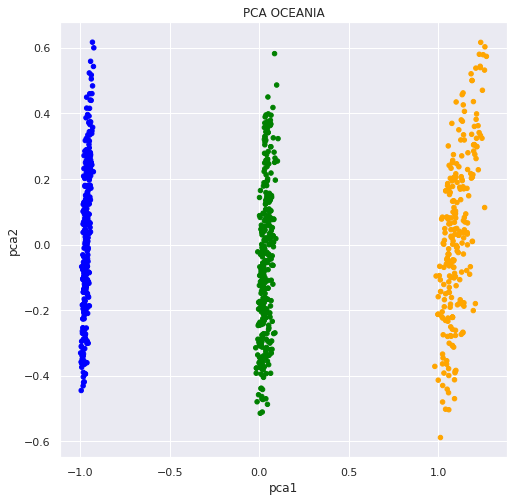

In [46]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_title('PCA OCEANIA')
colors = np.array(['blue', 'green', 'orange', 'yellow','brown','red','black','purple', 'gray', 'black'])
ax.scatter(x=df_pca_oceania['pca1'], y=df_pca_oceania['pca2'], c=colors[df_pca_oceania['clusters']], s=20)
plt.show()

### 1.4. Analyzing Results

In [49]:
df_left_southamerica = pd.DataFrame(data=df_southamerica.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_southamerica_results = pd.concat([df_left_southamerica, df_southamerica_features], axis=1)

df_left_northamerica = pd.DataFrame(data=df_northamerica.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_northamerica_results = pd.concat([df_left_northamerica, df_northamerica_features], axis=1)

df_left_europe = pd.DataFrame(data=df_europe.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_europe_results = pd.concat([df_left_europe, df_europe_features], axis=1)

df_left_asia = pd.DataFrame(data=df_asia.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_asia_results = pd.concat([df_left_asia, df_asia_features], axis=1)

df_left_africa = pd.DataFrame(data=df_africa.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_africa_results = pd.concat([df_left_africa, df_africa_features], axis=1)

df_left_oceania = pd.DataFrame(data=df_oceania.loc[:, ['country', 'date_extraction', 'track_id', 'album', 'artist', 'track_name']])
df_oceania_results = pd.concat([df_left_oceania, df_oceania_features], axis=1)

In [51]:
df_southamerica_results['clusters'].value_counts()

1    693
2    596
0    392
4    263
3    222
Name: clusters, dtype: int64

In [52]:
df_northamerica_results['clusters'].value_counts()

3    580
1    530
0    529
2    465
4    333
Name: clusters, dtype: int64

In [53]:
df_europe_results['clusters'].value_counts()

5    1722
4    1677
2    1016
7     978
3     957
9     869
0     758
1     684
8     606
6     433
Name: clusters, dtype: int64

In [54]:
df_asia_results['clusters'].value_counts()

7    759
6    581
2    503
8    496
5    457
1    438
3    433
4    419
0    220
Name: clusters, dtype: int64

In [55]:
df_africa_results['clusters'].value_counts()

0    238
4    229
2    176
1    154
3     92
Name: clusters, dtype: int64

In [56]:
df_oceania_results['clusters'].value_counts()

1    339
0    304
2    255
Name: clusters, dtype: int64

### 1.5. Continents

**Southamerica**

In [57]:
df_southamerica_results.loc[df_southamerica_results.loc[:, 'clusters'] == 0].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
882,Argentina,2020-03-26,08ilexedmUuccTWTeK7Dvb,"John C: Bzrp Music Sessions, Vol. 18","Bizarrap,John C","John C: Bzrp Music Sessions, Vol. 18",0.714,0.3680,0.864,0.698,0
2153,Uruguay,2020-06-11,0P0UtGDZpUMWoFCuDTn78K,Honey Boo,"CNCO,Natti Natasha",Honey Boo,0.642,0.1530,0.856,0.803,0
206,Ecuador,2020-01-01,1jD48pmiHMSVHHPzKLi4P3,Atrevido,Eddy Herrera,Tu Eres Ajena,0.788,0.2670,0.939,0.751,0
852,Brazil,2020-03-24,7yYsyXQa2JgbyL9fkEiUNt,Amor de Que,Pabllo Vittar,Amor de Que,0.819,0.0726,0.904,0.737,0
216,Ecuador,2020-01-01,5ZItTEr683KLPy8ULRUeu8,Zapateando Juyayay Ec,Jayac,Zapateando Juyayay Ec,0.956,0.2090,0.865,0.581,0
1487,Brazil,2020-06-07,4RC2nzqaQygxoVQOVv3XlT,Contatinho (Ao Vivo),"Leo Santana,Anitta",Contatinho - Ao Vivo,0.934,0.2230,0.813,0.787,0
271,Uruguay,2020-01-01,2Q1rZgsquv0lUm4UbHbdMO,La Noche,"Mariano Bermudez,La Sandonga",La Noche,0.853,0.2770,0.842,0.662,0
1883,Peru,2020-06-11,2q9udNV9NK0BL3q9p6TLxf,Pa' Otro La 'O,ChiChi Peralta,Procura,0.757,0.2790,0.973,0.805,0
178,Colombia,2020-01-01,6GcoHUq3d93vjSlDCqUkJO,Éxitos los Tupamaros,"Los Tupamaros,David,Rochy",La Chica Gomela (Niña Fresa),0.872,0.2940,0.958,0.794,0
818,Chile,2020-03-19,7BuHdm4lQqcyG3qTwdkxus,"Los Campeones del Pueblo ""The Big Leagues""","Wisin & Yandel,Romeo Santos",Aullando,0.740,0.1840,0.775,0.800,0


In [58]:
df_southamerica_results.loc[df_southamerica_results.loc[:, 'clusters'] == 1].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
686,Chile,2020-03-02,3EK4tGkSiO5xvvB5sM4tln,La Trenza,"Mon Laferte,Juanes",Amárrame,0.674,0.247,0.784,0.563,1
1823,Colombia,2020-06-11,6bfsLxdThst8i1LfkVmLZr,FERXXO (VOL 1: M.O.R),"Feid,Maluma,Sky Rompiendo",FRESH KERIAS,0.574,0.278,0.745,0.741,1
555,Argentina,2020-02-16,6z6aUQtuqZzq2tbyVwHO6n,corazon de papel,Los Charros,Amores Como el Nuestro,0.876,0.385,0.788,0.614,1
1485,Brazil,2020-06-07,3AV1KI22k1jGMz792lDrj1,Conquistas - EP 1 (Ao Vivo),"Os Barões Da Pisadinha,Xand Avião",Basta Você Me Ligar (feat. Xand Avião) - Ao Vivo,0.914,0.500,0.831,0.599,1
2029,Uruguay,2020-06-11,7BEPdOI0neT6p7PnLViqmH,Bajo La Mesa,"Morat,Sebastian Yatra",Bajo La Mesa,0.624,0.238,0.783,0.716,1
1792,Chile,2020-06-11,3l6Dc2DvpzEXJxnRTX5JUd,Nocturna (Remix),"Nio Garcia,Bryant Myers,Lenny Tavárez,Miky Woo...",Nocturna - Remix,0.737,0.614,0.784,0.781,1
916,Chile,2020-04-01,3TTragde5roTvwS2caAQOc,Perreito (Remix),"Mariah,Arcangel,Darell",Perreito - Remix,0.701,0.313,0.713,0.788,1
514,Bolivia,2020-02-09,0KHhNlHN5lWn7q332PiPys,ADN,Manuel Turizo,Sola,0.706,0.483,0.856,0.704,1
676,Chile,2020-03-01,1m69ELEgE6k5ZWsap40ozt,Odisea,Ozuna,Se Preparó,0.821,0.222,0.693,0.739,1
313,Chile,2020-01-07,4lpdQrp4w3n5NLGD71nzZY,SIN TI,"Young Cister,Polimá Westcoast",SIN TI,0.815,0.296,0.555,0.605,1


In [59]:
df_southamerica_results.loc[df_southamerica_results.loc[:, 'clusters'] == 2].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
1037,Chile,2020-04-19,2lDqMlnImMn4bwsim7vrpV,Los 90 Piketes,Miky Woodz,Un Día Más o un Día Menos,0.683,0.1580,0.467,0.762,2
920,Peru,2020-04-02,2sRhe52xJklfzRIe0K6puw,Voy Por Ti,"Cali Y El Dandee,Piso 21",Voy Por Ti,0.852,0.0276,0.775,0.722,2
1864,Peru,2020-06-11,25ZAibhr3bdlMCLmubZDVt,OASIS,"J Balvin,Bad Bunny",QUE PRETENDES,0.791,0.0275,0.939,0.639,2
736,Uruguay,2020-03-10,5qII2n90lVdPDcgXEEVHNy,Songs About Jane: 10th Anniversary Edition,Maroon 5,Sunday Morning,0.768,0.0913,0.809,0.608,2
356,Brazil,2020-01-15,7aiClxsDWFRQ0Kzk5KI5ku,hot girl bummer,blackbear,hot girl bummer,0.559,0.1280,0.678,0.778,2
377,Argentina,2020-01-18,3QVHSV8YKYq4L8tI5rnFgj,Music To Be Murdered By,Eminem,Stepdad,0.805,0.0180,0.557,0.779,2
867,Peru,2020-03-24,7mWFF4gPADjTQjC97CgFVt,"Baila Baila Baila (Remix) [feat. Farruko, Anue...","Ozuna,Daddy Yankee,J Balvin,Farruko,Anuel AA",Baila Baila Baila - Remix,0.572,0.0598,0.490,0.785,2
974,Chile,2020-04-08,6exje52SuWDGQ2Ol8K4P5I,Pensando En Ti,"Pablo Chill-E,Chuchu Retro",Pensando En Ti,0.512,0.1580,0.472,0.850,2
405,Brazil,2020-01-23,1RjXeMh0fK2BatVETXZXFy,Ouro,"Vitão,Feid",7 Chamadas,0.482,0.0848,0.692,0.893,2
909,Brazil,2020-03-31,6uAFJ75WDAoAPyCWJAtvks,Future Nostalgia,Dua Lipa,Good In Bed,0.701,0.1380,0.653,0.727,2


In [60]:
df_southamerica_results.loc[df_southamerica_results.loc[:, 'clusters'] == 3].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
424,Bolivia,2020-01-26,7dNwJbsT0sg1le5kVugGJb,Bubalu,"Becky G,Prince Royce,DJ Luian,Mambo Kingz,Anue...",Bubalu,0.355,0.616,0.2530,0.800,3
1498,Colombia,2020-06-07,48IBWHFp9h0rrbV9zFDWyy,En Tus Manos,"Paola Jara,Jessi Uribe",Como Si Nada,0.526,0.617,0.4490,0.612,3
1724,Brazil,2020-06-11,31yFXM26dazFnWI2eoOM5R,Ela Vem,"MC G15,Mc Livinho",Ela Vem,0.634,0.619,0.5860,0.616,3
1748,Brazil,2020-06-11,4Y7ay3naWoluoOM3xIj1UZ,Spotify Singles,Ludmilla,"A boba fui eu - Recorded At Mosh Studios, São ...",0.466,0.733,0.5560,0.673,3
2090,Uruguay,2020-06-11,2TH65lNHgvLxCKXM3apjxI,Callaita,"Bad Bunny,Tainy",Callaita,0.624,0.600,0.2440,0.610,3
1723,Brazil,2020-06-11,3fLqmaO4vvZpFZSZy52VMp,Deixa (feat. Ana Gabriela),"Lagum,Ana Gabriela",Deixa (feat. Ana Gabriela),0.326,0.821,0.3230,0.498,3
1118,Brazil,2020-04-30,5cN5ZOVcYBl4Lnq50Zeqsx,Tem Moda Pra Tudo (Ao Vivo),"Matheus & Kauan,Gusttavo Lima",Mágica - Ao Vivo,0.698,0.629,0.5340,0.568,3
333,Uruguay,2020-01-10,2C0hTkdEoikhKzDCJl32QZ,Rare,"Selena Gomez,6LACK",Crowded Room (feat. 6LACK),0.415,0.764,0.3280,0.724,3
1168,Ecuador,2020-05-06,4ZLzoOkj0MPWrTLvooIuaa,Get You The Moon (feat. Snøw),"Kina,Snøw",Get You The Moon (feat. Snøw),0.235,0.720,0.0895,0.498,3
817,Chile,2020-03-19,3V8UKqhEK5zBkBb6d6ub8i,Te Boté (Remix),"Nio Garcia,Casper Magico,Bad Bunny,Darell,Ozun...",Te Boté - Remix,0.675,0.542,0.4420,0.903,3


In [61]:
df_southamerica_results.loc[df_southamerica_results.loc[:, 'clusters'] == 4].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
648,Chile,2020-02-26,23o7KuK4jNJInTiOFogpXO,La Fortaleza,Francisca Valenzuela,Flotando,0.689,0.303,0.404,0.608,4
662,Paraguay,2020-02-28,2MsIbNboEVduidfmcThA0U,Recuerdos (Remix),"Juhn,Brytiago,Myke Towers,Lenny Tavárez,Farruko",Recuerdos (Remix),0.518,0.341,0.507,0.755,4
1390,Argentina,2020-05-29,3AqTxiGYce1CaTWvl7JsLj,2030,LOUTA,MEDIA HORA,0.340,0.191,0.327,0.655,4
1417,Uruguay,2020-06-01,5lDI0aZlCel1GppWDtRlE3,Asimetría,Zeballos,Catarsis,0.541,0.251,0.349,0.526,4
1109,Brazil,2020-04-27,7Dp0unlUzhQtk60rVq5mMC,Céu,Gabriela Rocha,Lugar Secreto,0.613,0.146,0.147,0.309,4
1091,Chile,2020-04-25,0IGQvkMGwRuL0wWzVQw1Bc,Illuminati,"Lil Pump,Anuel AA",Illuminati,0.538,0.180,0.233,0.764,4
2134,Uruguay,2020-06-11,2ONADYjJvqYVwjWavuY0H1,TRES PUNTOS SUSPENSIVOS,WOS,ALMA DINAMITA,0.800,0.210,0.247,0.451,4
1426,Argentina,2020-06-03,1dKjLvlAPTPlhRCFyA84Z9,TRES PUNTOS SUSPENSIVOS,"WOS,MANU OLIVA",ALGO DEL VACÍO,0.685,0.306,0.383,0.642,4
349,Brazil,2020-01-14,709F4UQ2uKplKvcD88xffa,Nave Espacial,"Liu,Samantha Machado",Nave Espacial - Radio Edit,0.763,0.119,0.242,0.777,4
2055,Uruguay,2020-06-11,14wf185UxfNbSy8dwt4r4q,MAMACITA,"Black Eyed Peas,Ozuna,J. Rey Soul",MAMACITA,0.635,0.193,0.428,0.894,4


**Northamerica**

In [63]:
df_northamerica_results.loc[df_northamerica_results.loc[:, 'clusters'] == 0].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
474,United States,2020-02-01,3tQ1sVcdTxPEn5SEy0nkCQ,Funeral,Lil Wayne,Not Me,0.616,0.401,0.585,0.897,0
81,Honduras,2020-01-01,0VEYvjI9G62xGIH97QM9cD,Piano Merengue,Damiron,Piano Merengue,0.432,0.550,0.847,0.684,0
61,Dominican Republic,2020-01-01,2eznjPXhNofd8IwVPSDGsV,Arrasando Con Todo ¡Ay Doctor!,Bonny Cepeda,Me Tiene Chivo,0.757,0.649,0.945,0.663,0
1186,Panama,2020-04-12,302I7g0l3jmAbzFu9WBCmu,Tutu (Remix),"Camilo,Shakira,Pedro Capó",Tutu - Remix,0.763,0.382,0.865,0.731,0
1668,Mexico,2020-05-28,1yXOIdoYQiLMDzx9UHwD29,AYAYAY!,Christian Nodal,AYAYAY!,0.629,0.486,0.703,0.665,0
1401,Panama,2020-05-07,3PjUD68c19gYpExATiHP94,Sonrisas Tristes,Boza,La Nena,0.786,0.260,0.950,0.611,0
2097,Dominican Republic,2020-06-11,5bx7WTctZtLh8Rd7TaPrQu,Carne,"Maffio,Don Miguelo",Carne,0.625,0.378,0.698,0.943,0
1918,Canada,2020-06-11,3H7ihDc1dqLriiWXwsc2po,Breaking Me,"Topic,A7S",Breaking Me,0.720,0.223,0.664,0.789,0
617,Canada,2020-02-15,1Slwb6dOYkBlWal1PGtnNg,x (Wembley Edition),Ed Sheeran,Thinking out Loud,0.445,0.474,0.591,0.781,0
2319,El Salvador,2020-06-11,6K5BsR04ijf3FHNzjbaagD,Si Se da Remix,"Myke Towers,Farruko,Arcangel,Sech,Zion",Si Se Da - Remix,0.672,0.441,0.774,0.817,0


In [64]:
df_northamerica_results.loc[df_northamerica_results.loc[:, 'clusters'] == 1].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
1023,Panama,2020-03-24,1rTH7iZm1k7dPA5ShCJzFl,Modo Avión,Dalex,Qué Tal,0.612,0.04400,0.423,0.615,1
467,Canada,2020-01-31,0NPpHHVwyiq5PgWFK4YyI9,The First Dimension,The 7 Dimensions,Faygo,0.406,0.01710,0.334,0.840,1
232,Canada,2020-01-06,3XMWGQIxFGOqQVMRBpTeKO,Blueberry Fejgo,Khlaw,Blueberry Fejgo,0.398,0.02460,0.309,0.824,1
623,Dominican Republic,2020-02-15,2z1ACAitQVTvo1ynh7EtAd,Nibiru,"Ozuna,Sech",Yo Tengo una Gata,0.632,0.04650,0.819,0.770,1
2238,El Salvador,2020-06-11,2DEZmgHKAvm41k4J3R2E9Y,YHLQMDLG,"Bad Bunny,Jowell & Randy,Nengo Flow",Safaera,0.829,0.01030,0.685,0.607,1
967,El Salvador,2020-03-19,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,Blinding Lights,0.796,0.00147,0.345,0.513,1
960,Canada,2020-03-19,7rpNuuoMbid56XkDsx2FjE,Heartbreak Weather,Niall Horan,Black And White,0.582,0.03010,0.239,0.443,1
547,United States,2020-02-09,00ko9WaS4jOX1kEk3gvHjf,The Big Day,"Chance the Rapper,MadeinTYO,DaBaby",Hot Shower,0.509,0.00157,0.599,0.899,1
15,Canada,2020-01-01,6QgjcU0zLnzq5OrUoSZ3OK,Woodstock,Portugal. The Man,Feel It Still,0.795,0.04170,0.754,0.801,1
927,Canada,2020-03-15,5tBdxqz8gauIO8Hh8qwo0H,Eternal Atake (Deluxe) - LUV vs. The World 2,"Lil Uzi Vert,Young Nudy",Money Spread (feat. Young Nudy),0.617,0.02270,0.226,0.780,1


In [65]:
df_northamerica_results.loc[df_northamerica_results.loc[:, 'clusters'] == 2].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
1094,Panama,2020-04-02,380s4xgCihI5PhbbvYt6cP,Modo Avión,"Dalex,Jay Wheeler",Perder,0.359,0.855,0.4560,0.651,2
2296,El Salvador,2020-06-11,5eEQCfq7MXQr6aHLNRUZLs,Keii,Anuel AA,Keii,0.797,0.400,0.5100,0.708,2
578,United States,2020-02-12,3XF5xLJHOQQRbWya6hBp7d,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,you should see me in a crown,0.533,0.462,0.3230,0.678,2
902,United States,2020-03-13,38HkYfvnhHLLB5Yaj2VpZg,Heaven Or Hell,Don Toliver,No Photos,0.729,0.290,0.3660,0.752,2
197,United States,2020-01-03,7aP3ZnCrfQLFBFK4RiXpG2,Sinning With You,Sam Hunt,Sinning With You,0.505,0.609,0.2940,0.744,2
1079,Dominican Republic,2020-03-30,5uAe6AXcN2SEOcOAy0Txkh,Mueve la Cadera,"El Alfa,Chael Produciendo,Kiko el Crazy",Mueve la Cadera,0.908,0.113,0.4490,0.946,2
2245,El Salvador,2020-06-11,5stPVcRqb4qixbafP9e8lt,Hola (Remix),"Dalex,Lenny Tavárez,Chencho Corleone,Juhn,Díme...",Hola - Remix,0.672,0.471,0.3430,0.654,2
1470,United States,2020-05-14,5nexAvWNhwg51EavnDgViy,It Was Good Until It Wasn't,Kehlani,Toxic,0.453,0.307,0.0405,0.653,2
1873,United States,2020-06-11,6U0FIYXCQ3TGrk4tFpLrEA,GINGER,BROCKHAMPTON,SUGAR,0.538,0.449,0.5160,0.453,2
805,Panama,2020-02-29,4jBpZsZ9qx3cZhoEfuKElF,La Mentira (Remix),"Brytiago,Rafa Pabön,Sech,Myke Towers,Cazzu,Rau...",La Mentira - Remix,0.695,0.395,0.5100,0.811,2


In [66]:
df_northamerica_results.loc[df_northamerica_results.loc[:, 'clusters'] == 3].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
414,Honduras,2020-01-26,3EJTCYD1PUIpYIz11C028p,La Parranda (Sei Sei Bei),Kazzabe,La Parranda (Sei Sei Bei),0.682,0.1600,0.506,0.496,3
411,Costa Rica,2020-01-26,4C1Smq2t3MVOPzsUPWW0oX,King Of The Dancehall,Vybz Kartel,Fever,0.620,0.1390,0.404,0.891,3
462,El Salvador,2020-01-30,0lbhKycRyqkOMKZ6thzfU4,Mi Error (Remix),"Eladio Carrion,Zion & Lennox,Wisin & Yandel,Lunay",Mi Error - Remix,0.841,0.0985,0.432,0.663,3
1308,Canada,2020-04-23,7sMu0DXeCVYwTivw9kBl99,DND,Polo G,DND,0.786,0.1290,0.241,0.778,3
920,United States,2020-03-15,4wBcaYqLPm7EtDVoJQORU4,Eternal Atake,Lil Uzi Vert,Bust Me,0.703,0.2370,0.614,0.736,3
1991,Canada,2020-06-11,3HWzoMvoF3TQfYg4UPszDq,Cuz I Love You (Super Deluxe),Lizzo,Truth Hurts,0.624,0.1100,0.412,0.715,3
2237,El Salvador,2020-06-11,380HmhwTE2NJgawn1NwkXi,Colores,J Balvin,Rojo,0.598,0.1930,0.400,0.663,3
1319,Mexico,2020-04-24,7wqqITYuu4S9YqVZMlT7OH,Humo en la Trampa 2,"Aleman,Natanael Cano",Los Duros,0.777,0.0623,0.313,0.752,3
1204,Canada,2020-04-14,6lruHh1jF7ezgbLv72xYmf,Living Facts,Arizona Zervas,FML,0.575,0.1130,0.616,0.822,3
201,United States,2020-01-04,3ucRKbRlikYHyoI17gfR0c,All Me (feat. Keyshia Cole),"Kehlani,Keyshia Cole",All Me (feat. Keyshia Cole),0.731,0.2330,0.588,0.420,3


In [67]:
df_northamerica_results.loc[df_northamerica_results.loc[:, 'clusters'] == 4].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
1159,Panama,2020-04-09,5NJSLryp5WviTmppF33Peg,No Encuentro Palabras,"Abraham Mateo,Manuel Turizo",No Encuentro Palabras,0.694,0.1520,0.630,0.742,4
2266,El Salvador,2020-06-11,2lCkncy6bIB0LTMT7kvrD1,Colores,J Balvin,Azul,0.836,0.0816,0.650,0.843,4
554,Costa Rica,2020-02-09,2LyHAsMcpW0Dm17rWYa79p,Cómo Te Voy A Olvidar ¡Edición De Súper Lujo!,"Los Angeles Azules,Ximena Sariñana",Mis Sentimientos,0.700,0.2230,0.836,0.749,4
897,United States,2020-03-13,2yUy5eFAFWAichjrySJWA2,Chilombo,"Jhené Aiko,Future,Miguel",Happiness Over Everything (H.O.E.) (feat. Futu...,0.674,0.1310,0.867,0.415,4
621,Dominican Republic,2020-02-15,37FR6UpaWbCREGbTHYdX3v,Mi Derriengue,Riccie Oriach,Antojo,0.822,0.1870,0.694,0.617,4
2301,El Salvador,2020-06-11,1ndyl3wJCFs872XZ3ztPk6,"DJ No Pare (feat. Zion, Dalex, Lenny Tavárez) ...","Justin Quiles,Natti Natasha,Farruko,Dalex,Lenn...","DJ No Pare (feat. Zion, Dalex, Lenny Tavárez) ...",0.709,0.0451,0.831,0.743,4
1949,Canada,2020-06-11,4HDCLYli2SUdkq9OjmvhSD,PARTYMOBILE,"PARTYNEXTDOOR,Rihanna",BELIEVE IT,0.700,0.0902,0.731,0.430,4
1632,El Salvador,2020-05-27,2UAWYufVaO3EnUUNzl0ppO,Caravana,WOS,CANGURO,0.751,0.1730,0.934,0.602,4
2300,El Salvador,2020-06-11,56f5qnyAlZdlz8wrUDA50h,Para Aventuras y Curiosidades,"Mau y Ricky,Manuel Turizo,Camilo",Desconocidos,0.753,0.1180,0.675,0.719,4
1523,Panama,2020-05-17,0COzrx37049Dzru93E0Uhc,la Chumerri,"Italian Somali,El Combo de Oro",la Chumerri,0.739,0.1280,0.964,0.656,4


**Europe**

In [69]:
df_europe_results.loc[df_europe_results.loc[:, 'clusters'] == 0].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
3279,France,2020-03-17,4vR2zaYAW8CtzwodeFufkI,Mr Sal,Niska,Du lundi au lundi,0.671,0.1760,0.406,0.819,0
5020,Spain,2020-04-29,6EWWkqE4aFlZRyoFwwOT8u,Pa Los Gustos Los Colores,Javiielo,Pa Los Gustos Los Colores,0.684,0.1910,0.411,0.742,0
2390,Hungary,2020-02-28,7E91ECLi2J4L21tEX0RBHn,Cruel Intentions,"Delacey,G-Eazy",Cruel Intentions,0.878,0.0883,0.227,0.677,0
1506,Greece,2020-02-10,1bRO28yzxgO3y3UmNR29TZ,Funeral,"Lil Wayne,Big Sean,Lil Baby","I Do It (ft. Big Sean, Lil Baby)",0.528,0.1250,0.321,0.804,0
3187,Slovakia,2020-03-15,1L9eakl2jauTWSyeFPCSLP,999,"Karlo,Davs",Toč sa,0.752,0.1090,0.297,0.710,0
9103,Romania,2020-06-11,6xcJyGpfZbuuiequtnlKt4,ASTROWORLD,Travis Scott,BUTTERFLY EFFECT,0.628,0.0530,0.196,0.764,0
8006,France,2020-06-11,4VW2dYyax9XGl5qPwAtRSf,Prison pour mineurs,Hatik,Prison pour mineurs,0.693,0.1340,0.285,0.742,0
3522,Greece,2020-03-21,3SiMJnYii9WvjORvemp1Zi,Big Chunes,Slogan,"Kanye Attitude, Drake Feelings",0.665,0.0403,0.165,0.741,0
987,Turkey,2020-01-29,6shRLlZDg3QQXegSuU0dOP,Kaparoz,"Emboli,Ati242",Kaparoz,0.531,0.1240,0.344,0.796,0
1982,Norway,2020-02-20,1oM2IB3Aajsp75j98ruVpV,One Last Time,Rein Alexander,One Last Time,0.866,0.1440,0.405,0.654,0


In [70]:
df_europe_results.loc[df_europe_results.loc[:, 'clusters'] == 1].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
7953,Finland,2020-06-11,4Q1ixIPlK5hR16qZgRNKcN,Jano,"Gasellit,JVG",Mitä Mä Malagas?,0.747,0.3190,0.887,0.791,1
3761,Latvia,2020-03-27,7hpsyxxgXGyxoHQBwFPVvv,Autopilots,"Prusax,Steps",Autopilots,0.658,0.2410,0.809,0.854,1
6097,Italy,2020-05-24,132ALUzVLmqYB4UsBj5qD6,Homerun,Paulo Londra,Adan y Eva,0.709,0.3230,0.720,0.767,1
8949,Poland,2020-06-11,0XmQabmXUU4ubnZj8b2qX4,Uśmiech,"Jan-Rapowanie,Nocny,Vito Bambino",Co ja wiem?,0.745,0.3030,0.747,0.806,1
3155,United Kingdom,2020-03-15,1MM7XFWwDxUIW7sn1toUaa,Bully Beef (feat. Fredo),"Young T & Bugsey,Fredo",Bully Beef (feat. Fredo),0.559,0.2980,0.844,0.770,1
4810,Spain,2020-04-23,36WEIfujsYbkA2WoLhSRkl,Y a mi qué?,"Don Patricio,InnerCut",Y a mi qué?,0.440,0.3300,0.894,0.926,1
6585,Denmark,2020-06-02,0f7Z4VKDktgO4YaAXmm3SY,BOIS FOREVER,Citybois,Du Ka' Li',0.669,0.0869,0.833,0.745,1
7871,Finland,2020-06-11,4BTGcyauPG7s9ECo5Qw90G,LINKO,"Lord Est,MEGA-Ertsi",LINKO,0.943,0.3790,0.886,0.706,1
407,France,2020-01-11,1Bhm5HNO1cq8olDbBmokyL,NAKAMURA,Aya Nakamura,Copines,0.787,0.2680,0.904,0.701,1
8139,Greece,2020-06-11,1lbrmucxyaFko2m90S2NIU,TOPBOY,Snik,Highway,0.843,0.1950,0.856,0.723,1


In [71]:
df_europe_results.loc[df_europe_results.loc[:, 'clusters'] == 2].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
329,Sweden,2020-01-09,03ARE7xKtbCVV2GE5j0IWq,Make Us Never Happen,SHY Martin,Make Us Never Happen,0.489,0.308,0.331,0.610,2
9642,Turkey,2020-06-11,79bKKv3MNqU7jec2IFKw7d,Zaman Beklemez,Pinhani,Ne Güzel Güldün,0.482,0.461,0.185,0.264,2
3029,United Kingdom,2020-03-13,5YIUAdjnj180Fkqwf0J5X0,Ei8ht Mile,"DigDat,D-Block Europe",New Dior (feat. D-Block Europe),0.531,0.459,0.384,0.729,2
5967,Belgium,2020-05-22,2C2zUnNmSD57Dlk6MUycLH,Houd De Dief (Uit Liefde Voor Muziek),Karen Damen,Houd De Dief - Uit Liefde Voor Muziek,0.532,0.595,0.313,0.651,2
1985,Poland,2020-02-20,2qXUbH5y8YbiqUm0VU1h7k,Tusz,"Smolasty,Tymek",Tusz (feat. Tymek),0.694,0.577,0.409,0.429,2
4128,Germany,2020-04-06,6gZEyiqUvEpWpJYz7QjLjx,BOI,"MAJAN,Schmyt,Megaloh",Monoton,0.630,0.283,0.259,0.600,2
3789,Poland,2020-03-28,4JduUaUNNzNjqhEolKJCcs,Art Brut 2,PRO8L3M,Zadzwoń do mnie,0.716,0.388,0.296,0.498,2
4336,Turkey,2020-04-10,4Z5kHD8BHexZH3Il0FhQvo,Yaratık,"Corr,Khontkar",Yaratık,0.752,0.499,0.318,0.838,2
9152,Romania,2020-06-11,6MYj8sosawOrDPeCeIrTIY,Maktub,"Azteca,Sapte",Youngthugga,0.620,0.281,0.110,0.779,2
656,Netherlands,2020-01-17,2cOwUzjqyk9S4PsAW7BycC,Spotify Singles,Kensington,Uncharted - Recorded at Spotify Studios Stockholm,0.410,0.248,0.184,0.570,2


In [72]:
df_europe_results.loc[df_europe_results.loc[:, 'clusters'] == 3].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
9641,Turkey,2020-06-11,6gBFPUFcJLzWGx4lenP6h2,Birds In The Trap Sing McKnight,Travis Scott,goosebumps,0.728,0.0847,0.430,0.841,3
1797,Hungary,2020-02-17,0Ei1aBiIELwXmUcIZDETOi,Pesetas,Rilès,Pesetas,0.659,0.0785,0.536,0.772,3
6043,Spain,2020-05-23,0WA73uP8IO1rczj8FFJzRg,Gitana (feat. Sergio Contreras y Demarco Flame...,"Rasel,Sergio Contreras,Demarco Flamenco",Gitana (feat. Sergio Contreras y Demarco Flame...,0.880,0.1810,0.670,0.822,3
6855,Germany,2020-06-06,6ix1AAPGvhH5uExQbGiUyk,SOKO DISKO,Dardan,AMIGA,0.777,0.1420,0.553,0.764,3
2662,Bulgaria,2020-03-06,11VyWPLK8nQqZEpsg2rkww,SUPERBORO,Boro Purvi,Майко Майко,0.536,0.0700,0.638,0.881,3
8238,Hungary,2020-06-11,25dMOeb3nDs8BPjxrQyOjR,Mostantól,"Rácz Gergõ,Orsovai Reni",Mostantól,0.678,0.1530,0.469,0.747,3
2517,Ireland,2020-03-03,3RauEVgRgj1IuWdJ9fDs70,Lover,Taylor Swift,The Man,0.658,0.0767,0.633,0.777,3
2351,Spain,2020-02-28,2N1YUkjeP4Zdbhhf0nKOoD,No Me Olvida,"Robledo,Omar Montes,Quimico Ultra Mega",No Me Olvida,0.802,0.1500,0.437,0.855,3
4666,Ireland,2020-04-18,5rFGVn8fCFjnRwCebW0XbS,BLAME IT ON BABY,"DaBaby,A Boogie Wit da Hoodie,London On Da Track",DROP (feat. A Boogie wit da Hoodie & London On...,0.589,0.1210,0.536,0.833,3
4887,Netherlands,2020-04-24,09lCpF8YS8wkP6bnxu3LNP,Joost Klein 7,"Joost,Donnie,Tice",Joost Klein 3,0.540,0.0876,0.650,0.768,3


In [73]:
df_europe_results.loc[df_europe_results.loc[:, 'clusters'] == 4].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
4347,France,2020-04-11,6rwKQhaT5mKp7KNizFS52B,High & Fines Herbes,"Caballero & JeanJass,Alkpote",Flash,0.606,0.03110,0.399,0.548,4
4233,Norway,2020-04-08,17rbsv7iUuFLM0IsUs3O50,Et godt stup i et grunt vann,Cezinando,Hollywood,0.704,0.02500,0.706,0.762,4
5746,Norway,2020-05-17,35lahxVWAM1ai1rdbVqNZ4,Bergen 2018,"TIX,The Pøssy Project",Bergen 2018,0.919,0.00130,0.422,0.540,4
58,Hungary,2020-01-01,5ChkMS8OtdzJeqyybCc9R5,Thriller 25 Super Deluxe Edition,Michael Jackson,Billie Jean,0.654,0.02360,0.847,0.920,4
5885,Romania,2020-05-20,0VgkVdmE4gld66l8iyGjgx,FUTURE,Future,Mask Off,0.434,0.01020,0.281,0.833,4
7401,Austria,2020-06-11,1XdMp6v9Q3N80WnKSbGfl4,Hollywood,"LA Vision,Gigi D'Agostino",Hollywood,0.793,0.00851,0.325,0.744,4
5753,Norway,2020-05-17,0stRXY2mRlTp1TH8RXYImW,Hitman 2018,Kung Vladimir,Hitman 2018,0.824,0.00362,0.327,0.842,4
38,Finland,2020-01-01,4LFQEdO2oBErEhQ5nBrs42,Mustaa kultaa,"JVG,Märkä-Simo",Häissä (feat. Märkä-Simo),0.758,0.00393,0.497,0.842,4
4299,Belgium,2020-04-10,0hOW6iNtMXxl9UB70gt8Bc,High & Fines Herbes,"Caballero & JeanJass,Lomepal",Brillant,0.567,0.02420,0.408,0.735,4
538,Germany,2020-01-16,034jxfixe0Gogd6p0reMnP,Nimmerland,RIN,Hollywood,0.698,0.03740,0.296,0.608,4


In [74]:
df_europe_results.loc[df_europe_results.loc[:, 'clusters'] == 5].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
7355,United Kingdom,2020-06-11,57RA3JGafJm5zRtKJiKPIm,Nothing Happens,"Wallows,Clairo",Are You Bored Yet? (feat. Clairo),0.683,0.156,0.640,0.682,5
9597,Turkey,2020-06-11,4Sng3wnol2Gb2yXgFdr9lj,Karanlık,"Dolu Kadehi Ters Tut,Sedef Sebüktekin",Gitme,0.416,0.352,0.696,0.685,5
155,Portugal,2020-01-04,6V43u5SCjkfMpxMAXRPifr,Sentou e Gostou,"MC JottaPê,MC M10,DJ RD",Sentou e Gostou,0.672,0.261,0.722,0.702,5
4444,Denmark,2020-04-14,3rGihyErlJWAViz6PKBtts,Shorty Ringer,Josef Og Elias,Shorty Ringer,0.414,0.227,0.517,0.882,5
4352,France,2020-04-11,1GNXSczL342ASGesva0oyq,High & Fines Herbes,Caballero & JeanJass,Il fait beau,0.521,0.300,0.553,0.932,5
2177,Sweden,2020-02-24,11mEeVI70ZkP0yYzybR3gc,Different Fella,Naod,Different Fella,0.726,0.326,0.585,0.771,5
2331,Germany,2020-02-28,3Tvl4fK2SEGBPF8zYVBqyP,Eine Minute,Fynn Kliemann,Eine Minute,0.808,0.370,0.422,0.697,5
720,Spain,2020-01-20,4CiTX0uVuC1UisedqHvPqv,Good as Hell,"Ariadna,Nia Correia",Good as Hell,0.619,0.288,0.474,0.487,5
2206,Netherlands,2020-02-25,7y2r0n2RRnLhoqSCiysFFa,Shooter,"Qlas & Blacka,Blacka",Shooter,0.597,0.327,0.266,0.810,5
2207,Netherlands,2020-02-25,3NlftUMTab8fusm5NVhH6D,Doe Je Juist,"Ronnie Flex,Priceless",Doe Je Juist,0.621,0.187,0.666,0.732,5


In [75]:
df_europe_results.loc[df_europe_results.loc[:, 'clusters'] == 6].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
5727,Norway,2020-05-17,0in8lJ9KqMLarpgWYCWSuU,Norwegian Colours,"Henry Caery,N. Fogtman,Gardemusikken",Kongesangen,0.272,0.918,0.4800,0.184,6
7560,Czech Republic,2020-06-11,3KOVDn7GSRJOt5UNUaOzx6,TIMBERLAKETRAPPED,CA$HANOVA BULHAR,Sem sober,0.302,0.777,0.3430,0.845,6
5278,United Kingdom,2020-05-08,6GieREfg0qAJImnDAcMSfD,The Legendary George Formby,George Formby,Bless 'Em All (The Service Song),0.250,0.881,0.9370,0.898,6
1380,Hungary,2020-02-07,18ssFhD04lWo1RzpcohnrG,Anyone,Demi Lovato,Anyone,0.387,0.876,0.3170,0.557,6
9368,Slovakia,2020-06-11,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,Memories,0.320,0.837,0.5750,0.764,6
4613,Romania,2020-04-17,6h3sTkv0Fp22FUWz1ByCAN,Hai sa spargem gheata,Cocos de la Calarasi,Hai sa spargem gheata,0.434,0.816,0.7560,0.750,6
5997,Ireland,2020-05-22,6KAf0R3bt14ZbVVUPaVSQQ,Notes On A Conditional Form,The 1975,Streaming,0.249,0.985,0.0393,0.205,6
8903,Poland,2020-06-11,00uYqJRTpz8xK83Tx8akJh,Każdego Dnia,Sobel,Każdego Dnia,0.258,0.931,0.6510,0.834,6
2898,Romania,2020-03-10,2ZTEI0OwVRrEW213gAoL3T,Intamplator,The Motans,Intamplator,0.470,0.812,0.4170,0.769,6
5718,Norway,2020-05-17,04A9ciXV2AQ9NEj9wWncso,Våre Kjære Barnesanger,Marianne Borhaug,Kom Mai Du Skjønne Milde,0.217,0.888,0.3360,0.671,6


In [76]:
df_europe_results.loc[df_europe_results.loc[:, 'clusters'] == 7].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
2626,France,2020-03-05,0XVnX79eQlKQv16xOMcpaI,Carré VIP,"Naps,Vald",Pour eux,0.705,0.484,0.610,0.707,7
4440,Germany,2020-04-14,10bHKIqKENeHMpvl4TlMUz,Sem7ini Mama,Ra'is,Sem7ini Mama,0.461,0.734,0.478,0.581,7
4386,Portugal,2020-04-12,4e0FYxSROat25pH16zMTZI,We Love You Tecca,Lil Tecca,Love Me,0.538,0.632,0.803,0.719,7
7769,Spain,2020-06-11,5tzOL69W6lCp4gAomIXMnJ,Quédate conmigo,"Pole.,Pilar Moxó",Quédate conmigo,0.715,0.677,0.460,0.580,7
2813,Italy,2020-03-09,7p3VjQ8j4CokBChMQz1ARQ,Nuova Registrazione 527 (prod. tha Supreme),"Mara Sattei,tha Supreme",Nuova Registrazione 527 - prod. tha Supreme,0.715,0.449,0.592,0.763,7
7147,Greece,2020-06-09,0LZlcwuFWPIOn8uZdpbqiG,Bye Bye,"Kings,EPITHE",Bye Bye,0.874,0.663,0.875,0.543,7
8070,France,2020-06-11,3AwXhQWatI5b1sLIhsnOdP,Album gratuit,Jul,Avant la douane,0.651,0.673,0.795,0.844,7
4619,Sweden,2020-04-17,04XJypnO9qTJpNKvM3fwKj,724 (Deluxe),Ant Wan,Makaveli,0.545,0.673,0.513,0.659,7
2011,Italy,2020-02-21,5pGox0nPJNbhxAPCkduUS8,Routine EP,Shiva,Scarabeo,0.658,0.466,0.644,0.737,7
2855,France,2020-03-10,4XDePuGEy7UDwhaM9cFOzF,NOUVO MODE,Sneazzy,NON STOP,0.741,0.732,0.418,0.866,7


In [77]:
df_europe_results.loc[df_europe_results.loc[:, 'clusters'] == 8].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
4376,Finland,2020-04-12,1B1JnmLD77pI04OvnKAnTR,HUMAN. :II: NATURE.,Nightwish,All the Works of Nature Which Adorn the World ...,0.492,0.1760,0.2920,0.372,8
9584,Turkey,2020-06-11,3eekarcy7kvN4yt5ZFzltW,HIGHEST IN THE ROOM,Travis Scott,HIGHEST IN THE ROOM,0.427,0.0546,0.0605,0.598,8
2051,Bulgaria,2020-02-22,2stnz28ZtIHkF5c7CoK6Yc,Who Cares,Azis,Who Cares,0.560,0.0997,0.4210,0.553,8
6164,Turkey,2020-05-25,3fCJpdK2u4PnZ3tBondozd,Orjinal Alt Yazılı,Feridun Düzağaç,Alev Alev,0.532,0.1150,0.3690,0.548,8
1261,France,2020-02-05,6gns0tb8houik3vqzDWgDT,Cité blanche,Larry,Maman me disait,0.578,0.2530,0.3240,0.528,8
7101,Sweden,2020-06-08,7bWxEJjDCSTkjTzJMZ6VKL,Spotify Singles,"Benjamin Ingrosso,Julie Bergan",I'll Be Fine Somehow - Recorded at Spotify Stu...,0.262,0.2460,0.3070,0.377,8
7490,Czech Republic,2020-06-11,7D2sgT3LkRnl6I7hunrsoj,Nemám dost (feat. Indigo & KOJO),"Calin,STEIN27,Indigo,KOJO",Nemám dost (feat. Indigo & KOJO),0.586,0.1160,0.2470,0.632,8
1816,Lithuania,2020-02-17,0hyCjRDCqWwcNCpwLK8oHX,Mulkis,jautì,Pasimiršk,0.435,0.0189,0.1630,0.453,8
2603,Finland,2020-03-05,4xidP0jGIoAgIv0ATaC518,Satuta mua kunnolla,costee,Satuta mua kunnolla,0.429,0.0697,0.2530,0.468,8
593,Portugal,2020-01-16,2fmyrECK6bdfoGven0UMZx,YOU,James Arthur,Naked,0.610,0.0840,0.2940,0.527,8


In [78]:
df_europe_results.loc[df_europe_results.loc[:, 'clusters'] == 9].sample(10)

,country,date_extraction,track_id,album,artist,track_name,track_energy,track_acousticness,track_valence,track_danceability,clusters
4955,United Kingdom,2020-04-27,0YhJO6feKxyGjwVo5NSXPD,Magic (feat. Bandokay & Double Lz),"iLL BLU,OFB,Bandokay,Double Lz",Magic (feat. Bandokay & Double Lz),0.831,0.0337,0.870,0.803,9
4549,Ireland,2020-04-16,2ajzBr7vwHTEBeqDzcsNRC,Eternal Atake,Lil Uzi Vert,That Way - Bonus Track,0.599,0.0554,0.503,0.712,9
7474,Bulgaria,2020-06-11,2rFZhVHWOwDxAy59qLUzLy,100 zhivota,Galena,100 zhivota,0.806,0.1220,0.542,0.600,9
886,Germany,2020-01-25,200cTjC6si5Xz9af2QeHi2,YA HERO YA MERO,MERO,Wolke 10,0.797,0.0662,0.393,0.770,9
8258,Hungary,2020-06-11,2dsbdPTyFRLJzJsgv8RISq,Meztelen,"Majka,Horváth Tamás",Meztelen,0.741,0.0908,0.444,0.754,9
9430,Slovakia,2020-06-11,7N06jo3EnV792VFaG8vuW6,Close Your Eyes,"Felix Jaehn,VIZE,Miss Li",Close Your Eyes,0.823,0.0663,0.520,0.818,9
5317,Spain,2020-05-08,4Gk5j308rOCeMJoB6KQJw4,Sal de Mí,Operación Triunfo 2020,Sal de Mí,0.757,0.1210,0.513,0.626,9
7483,Bulgaria,2020-06-11,1iIIsJlKQW7E4eLw7x5XOI,Da gori v lyubov,Preslava,Piyan,0.834,0.0826,0.782,0.695,9
1317,Italy,2020-02-06,3mj23ZA8LARtZSSVJxIZOi,Rosso di rabbia,Anastasio,Rosso di rabbia,0.737,0.1190,0.724,0.508,9
3033,Bulgaria,2020-03-13,4OIgj8LHBd0St9V1nuqBGq,Benzin,"Emanuela,Aria",Benzin,0.899,0.0784,0.913,0.520,9
